# Pandas를 사용한 데이터 분석 

* Point 기능 복습 
* 연산 속도, 성능 향상 중점으로

### 5.1 DataFrame 클래스

#### 5.1.1 1단계 

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame([10,20,30,40,],columns=['numbers'],index=['a','b','c','d'])
df

,numbers
a,10
b,20
c,30
d,40


In [4]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [5]:
df.columns

Index(['numbers'], dtype='object')

In [6]:
df.loc['c']

numbers    30
Name: c, dtype: int64

In [7]:
df.loc[['a','b']]

,numbers
a,10
b,20


In [8]:
df.iloc[1:3]

,numbers
b,20
c,30


In [9]:
df.sum()

numbers    100
dtype: int64

In [10]:
df.apply(lambda x: x**2)

,numbers
a,100
b,400
c,900
d,1600


In [11]:
df**2

,numbers
a,100
b,400
c,900
d,1600


In [12]:
df['floats'] = (1.5,2.5,3.5,4.5)
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [13]:
df['names'] = pd.DataFrame(['Yves','Sandra','Lilli','Henry'], index=['d','a','b','c'])
df

,numbers,floats,names
a,10,1.5,Sandra
b,20,2.5,Lilli
c,30,3.5,Henry
d,40,4.5,Yves


In [15]:
#인덱스 정보 손실
df.append({'numbers':100, 'floats':5.75,'names':'jil'},ignore_index=True)

C:\Users\smleo\AppData\Local\Temp\ipykernel_10792\3247535246.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({'numbers':100, 'floats':5.75,'names':'jil'},ignore_index=True)


,numbers,floats,names
0,10,1.50,Sandra
1,20,2.50,Lilli
2,30,3.50,Henry
3,40,4.50,Yves
4,100,5.75,jil


In [21]:
# 인덱스 정보 있는 상태에서 추가 
df = df.append(pd.DataFrame({'numbers':100,'floats':5.75,'names':'jill'}, index=['y',]))
df

C:\Users\smleo\AppData\Local\Temp\ipykernel_10792\3547737233.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'numbers':100,'floats':5.75,'names':'jill'}, index=['y',]))


,numbers,floats,names
a,10,1.50,Sandra
b,20,2.50,Lilli
c,30,3.50,Henry
d,40,4.50,Yves
y,100,5.75,jill
y,100,5.75,jill
y,100,5.75,jill


In [25]:
# 누락된값 추가시 Nan
df = df.append(pd.DataFrame({'names':'Litz'}, index=['z',]))
df

C:\Users\smleo\AppData\Local\Temp\ipykernel_10792\2549709344.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'names':'Litz'}, index=['z',]))


,numbers,floats,names
a,10.0,1.50,Sandra
b,20.0,2.50,Lilli
c,30.0,3.50,Henry
d,40.0,4.50,Yves
y,100.0,5.75,jill
y,100.0,5.75,jill
y,100.0,5.75,jill
z,NaN,NaN,Litz
z,NaN,NaN,Litz


In [26]:
df.dtypes

numbers    float64
floats     float64
names       object
dtype: object

In [28]:
#nan값 무시
df[['numbers','floats']].mean()

numbers    57.142857
floats      4.178571
dtype: float64

In [29]:
#nan값 무시 
df[['numbers','floats']].std()

numbers    41.115401
floats      1.730332
dtype: float64

#### 5.1.2 2단계

In [31]:
#DatetimeIndex 
import numpy as np 
np.random.seed(100)
a=np.random.standard_normal((9,4))
a

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [32]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


In [33]:
df.columns = ['No1','No2','No3','No4']
df

,No1,No2,No3,No4
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


* ★ 효율적인 금융 시계열 데이터 분석 -> 시간 인덱스 다루기 

In [34]:
dates = pd.date_range('2019-1-1', periods=9,freq='M')
dates

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30'],
              dtype='datetime64[ns]', freq='M')

In [36]:
df.index = dates
df

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,0.981321,0.514219,0.221180,-1.070043
2019-03-31,-0.189496,0.255001,-0.458027,0.435163
2019-04-30,-0.583595,0.816847,0.672721,-0.104411
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318
2019-06-30,1.618982,1.541605,-0.251879,-0.842436
2019-07-31,0.184519,0.937082,0.731000,1.361556
2019-08-31,-0.326238,0.055676,0.222400,-1.443217
2019-09-30,-0.756352,0.816454,0.750445,-0.455947


* date_range() 빈도 매개변수 찾아쓰기 

In [37]:
#ndarray 로 접근필요할 떄 
df.values

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

### 5.2 기본적인 분석 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2019-01-31 to 2019-09-30
Freq: M
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No1     9 non-null      float64
 1   No2     9 non-null      float64
 2   No3     9 non-null      float64
 3   No4     9 non-null      float64
dtypes: float64(4)
memory usage: 360.0 bytes


In [39]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.150212,0.701033,0.289193,-0.387788
std,0.988306,0.457685,0.579920,0.877532
min,-1.749765,0.055676,-0.458027,-1.443217
25%,-0.583595,0.342680,-0.251879,-1.070043
50%,-0.326238,0.816454,0.222400,-0.455947
75%,0.184519,0.937082,0.731000,-0.104411
max,1.618982,1.541605,1.153036,1.361556


In [43]:
df.sum()

No1   -1.351906
No2    6.309298
No3    2.602739
No4   -3.490089
dtype: float64

In [41]:
df.sum(axis=1)

2019-01-31   -0.506485
2019-02-28    0.646676
2019-03-31    0.042642
2019-04-30    0.801562
2019-05-31   -1.058002
2019-06-30    2.066272
2019-07-31    3.214157
2019-08-31   -1.491379
2019-09-30    0.354600
Freq: M, dtype: float64

In [44]:
df.cumsum()

,No1,No2,No3,No4
2019-01-31,-1.749765,0.342680,1.153036,-0.252436
2019-02-28,-0.768445,0.856899,1.374215,-1.322479
2019-03-31,-0.957941,1.111901,0.916188,-0.887316
2019-04-30,-1.541536,1.928748,1.588909,-0.991727
2019-05-31,-2.072816,2.958480,1.150774,-2.110045
2019-06-30,-0.453834,4.500086,0.898895,-2.952481
2019-07-31,-0.269316,5.437168,1.629895,-1.590925
2019-08-31,-0.595554,5.492844,1.852294,-3.034142
2019-09-30,-1.351906,6.309298,2.602739,-3.490089


In [45]:
#Numpy 의 유니버셜 함수도 이해가능
np.mean(df)

c:\Users\smleo\anaconda3\envs\finance_py\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

In [46]:
np.log(df)

c:\Users\smleo\anaconda3\envs\finance_py\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,No1,No2,No3,No4
2019-01-31,NaN,-1.070957,0.142398,NaN
2019-02-28,-0.018856,-0.665106,-1.508780,NaN
2019-03-31,NaN,-1.366486,NaN,-0.832033
2019-04-30,NaN,-0.202303,-0.396425,NaN
2019-05-31,NaN,0.029299,NaN,NaN
2019-06-30,0.481797,0.432824,NaN,NaN
2019-07-31,-1.690005,-0.064984,-0.313341,0.308628
2019-08-31,NaN,-2.888206,-1.503279,NaN
2019-09-30,NaN,-0.202785,-0.287089,NaN


In [47]:
np.sqrt(abs(df))

,No1,No2,No3,No4
2019-01-31,1.322787,0.585389,1.073795,0.502430
2019-02-28,0.990616,0.717091,0.470297,1.034429
2019-03-31,0.435311,0.504977,0.676777,0.659669
2019-04-30,0.763934,0.903796,0.820196,0.323127
2019-05-31,0.728890,1.014757,0.661918,1.057506
2019-06-30,1.272392,1.241614,0.501876,0.917843
2019-07-31,0.429556,0.968030,0.854986,1.166857
2019-08-31,0.571173,0.235958,0.471593,1.201340
2019-09-30,0.869685,0.903578,0.866282,0.675238


In [48]:
100* df + 100

,No1,No2,No3,No4
2019-01-31,-74.976547,134.268040,215.303580,74.756396
2019-02-28,198.132079,151.421884,122.117967,-7.004333
2019-03-31,81.050417,125.500144,54.197301,143.516349
2019-04-30,41.640495,181.684707,167.272081,89.558886
2019-05-31,46.871962,202.973269,56.186438,-11.831825
2019-06-30,261.898166,254.160517,74.812086,15.756426
2019-07-31,118.451869,193.708220,173.100034,236.155613
2019-08-31,67.376194,105.567601,122.239961,-44.321700
2019-09-30,24.364769,181.645401,175.044476,54.405307


#### 5.3 기본적인 시각화

C:\Users\smleo\AppData\Local\Temp\ipykernel_10792\1498801446.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: >

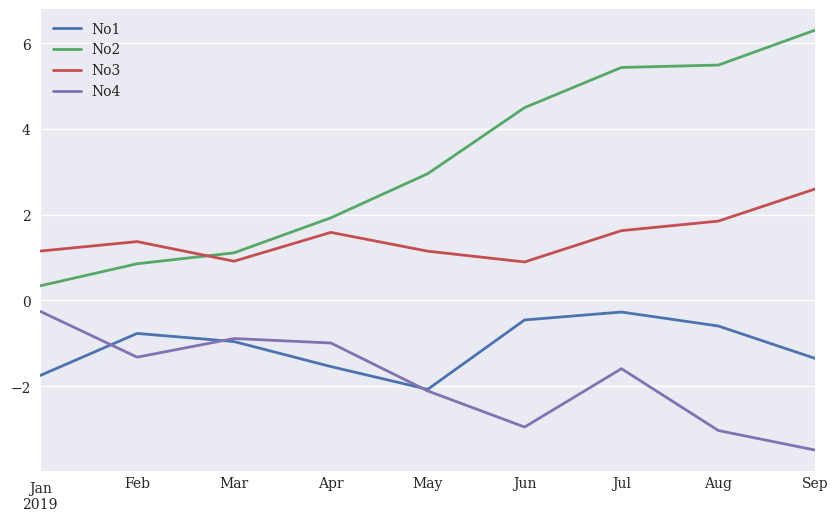

In [52]:
# pylab은 안쓸것 같지만..
from pylab import plt,mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

df.cumsum().plot(lw=2.0, figsize=(10,6))

<AxesSubplot: >

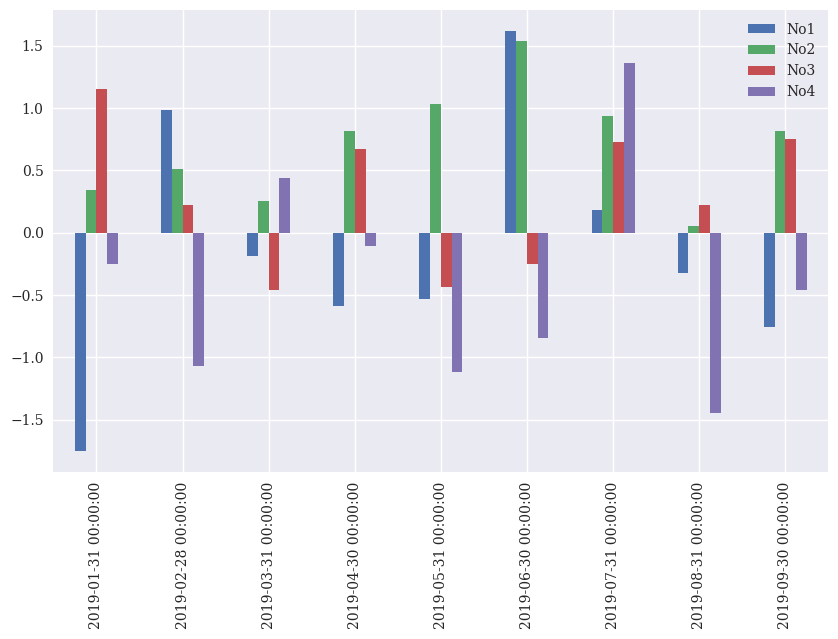

In [57]:
df.plot(kind='bar', figsize=(10,6))

#### 5.4 Series 클래스

* DataFrame의 특수한 경우로 볼 수 있고 모든 기능을 가지고 있지 않다. 

In [58]:
type(df)

pandas.core.frame.DataFrame

In [62]:
S = pd.Series(np.linspace(0,15,7),name='Series')
display(S)
print(type(S))

0     0.0
1     2.5
2     5.0
3     7.5
4    10.0
5    12.5
6    15.0
Name: Series, dtype: float64

<class 'pandas.core.series.Series'>


In [63]:
s = df['No1']
s

2019-01-31   -1.749765
2019-02-28    0.981321
2019-03-31   -0.189496
2019-04-30   -0.583595
2019-05-31   -0.531280
2019-06-30    1.618982
2019-07-31    0.184519
2019-08-31   -0.326238
2019-09-30   -0.756352
Freq: M, Name: No1, dtype: float64

#### 5.5 GroupBy 연산

In [65]:
df['Quarter'] = ['Q1','Q1','Q1','Q2','Q2','Q2','Q3','Q3','Q3']
df

,No1,No2,No3,No4,Quarter
2019-01-31,-1.749765,0.342680,1.153036,-0.252436,Q1
2019-02-28,0.981321,0.514219,0.221180,-1.070043,Q1
2019-03-31,-0.189496,0.255001,-0.458027,0.435163,Q1
2019-04-30,-0.583595,0.816847,0.672721,-0.104411,Q2
2019-05-31,-0.531280,1.029733,-0.438136,-1.118318,Q2
2019-06-30,1.618982,1.541605,-0.251879,-0.842436,Q2
2019-07-31,0.184519,0.937082,0.731000,1.361556,Q3
2019-08-31,-0.326238,0.055676,0.222400,-1.443217,Q3
2019-09-30,-0.756352,0.816454,0.750445,-0.455947,Q3


In [67]:
groups = df.groupby('Quarter')
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [68]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.319314,0.370634,0.305396,-0.295772
Q2,0.168035,1.129395,-0.005765,-0.688388
Q3,-0.299357,0.603071,0.567948,-0.179203


In [70]:
groups.aggregate([min,max]).round(2)

No1         No2         No3         No4      
          min   max   min   max   min   max   min   max
Quarter                                                
Q1      -1.75  0.98  0.26  0.51 -0.46  1.15 -1.07  0.44
Q2      -0.58  1.62  0.82  1.54 -0.44  0.67 -1.12 -0.10
Q3      -0.76  0.18  0.06  0.94  0.22  0.75 -1.44  1.36

In [71]:
df['Odd_even'] = ['Odd','Even','Odd','Even','Odd','Even','Odd','Even','Odd']
groups = df.groupby(['Quarter','Odd_even'])

In [72]:
groups.size()

Quarter  Odd_even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

### 5.6 고급 선택법

* 열 값에 조건 정하기나 논리적 결합하여 데이터 선택하는 경우 

In [73]:
data = np.random.standard_normal((10,2))

In [74]:
df = pd.DataFrame(data,columns=['x','y'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10 non-null     float64
 1   y       10 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [75]:
df.head()

,x,y
0,1.189622,-1.690617
1,-1.356399,-1.232435
2,-0.544439,-0.668172
3,0.007315,-0.612939
4,1.299748,-1.733096


In [76]:
df.tail()

,x,y
5,-0.983310,0.357508
6,-1.613579,1.470714
7,-1.188018,-0.549746
8,-0.940046,-0.827932
9,0.108863,0.507810


In [77]:
df['x']>0.5

0     True
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: x, dtype: bool

In [78]:
(df['x']>0)&(df['y']<0)

0     True
1    False
2    False
3     True
4     True
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [80]:
display(df[df['x']>0])
display(df.query('x>0')) # 괜찮네?

,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096
9,0.108863,0.507810


,x,y
0,1.189622,-1.690617
3,0.007315,-0.612939
4,1.299748,-1.733096
9,0.108863,0.507810


In [81]:
df[df>0]

,x,y
0,1.189622,NaN
1,NaN,NaN
2,NaN,NaN
3,0.007315,NaN
4,1.299748,NaN
5,NaN,0.357508
6,NaN,1.470714
7,NaN,NaN
8,NaN,NaN
9,0.108863,0.507810


### 5.7 병합,조인,머지 

In [82]:
df1 = pd.DataFrame(['100','200','300','400'], index=['a','b','c','d'], columns=['A',])

In [83]:
df2  = pd.DataFrame(['200','150','50'],index=['f','b','d'],columns=['B',])

#### 5.7.1 병합

In [84]:
df1.append(df2, sort=False)

C:\Users\smleo\AppData\Local\Temp\ipykernel_10792\50354407.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2, sort=False)


,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [85]:
df1.append(df2, ignore_index=True, sort=False)

C:\Users\smleo\AppData\Local\Temp\ipykernel_10792\2226406127.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2, ignore_index=True, sort=False)


,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


In [86]:
pd.concat((df1,df2),sort=False)

,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


#### 5.7.2 조인

In [87]:
df1.join(df2)

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [88]:
df2.join(df1)

,B,A
f,200,NaN
b,150,200
d,50,400


In [90]:
df1

,A
a,100
b,200
c,300
d,400


In [91]:
df2

,B
f,200
b,150
d,50


In [93]:
df1.join(df2, how='inner')

,A,B
b,200,150
d,400,50


In [94]:
df1.join(df2, how='outer')

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50
f,NaN,200


#### 5.7.3 merge

In [95]:
c = pd.Series([250,150,50],index=['b','d','c'])
df1['C'] = c
df2['C'] = c
display(df1)
display(df2)

,A,C
a,100,NaN
b,200,250.0
c,300,50.0
d,400,150.0


,B,C
f,200,NaN
b,150,250.0
d,50,150.0


In [96]:
pd.merge(df1,df2)

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [98]:
pd.merge(df1,df2, how='outer')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,300,50.0,NaN
3,400,150.0,50


In [99]:
pd.merge(df1,df2, left_on='A', right_on='B')

,A,C_x,B,C_y
0,200,250.0,200,NaN


In [100]:
pd.merge(df1,df2,left_on = 'A', right_on = 'B', how='outer')

,A,C_x,B,C_y
0,100,NaN,NaN,NaN
1,200,250.0,200,NaN
2,300,50.0,NaN,NaN
3,400,150.0,NaN,NaN
4,NaN,NaN,150,250.0
5,NaN,NaN,50,150.0


In [101]:
pd.merge(df1,df2, left_index = True, right_index=True)

,A,C_x,B,C_y
b,200,250.0,150,250.0
d,400,150.0,50,150.0


### 5.8 성능 측면 

In [102]:
data = np.random.standard_normal((1000000,2))
data.nbytes

16000000

In [103]:
df = pd.DataFrame(data,columns=['x','y'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   x       1000000 non-null  float64
 1   y       1000000 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [104]:
%time res = df['x'] + df['y']

CPU times: total: 0 ns
Wall time: 8.99 ms


In [105]:
res[:3]

0    0.387242
1   -0.969343
2   -0.863159
dtype: float64

In [106]:
%time res = df.sum(axis=1)

CPU times: total: 62.5 ms
Wall time: 85.9 ms


In [107]:
%time res = df.values.sum(axis=1)

CPU times: total: 31.2 ms
Wall time: 37 ms


In [108]:
%time res = np.sum(df,axis=1)

CPU times: total: 93.8 ms
Wall time: 77.9 ms


In [109]:
%time res = np.sum(df.values,axis=1)

CPU times: total: 31.2 ms
Wall time: 28 ms


In [110]:
%time res = df.eval('x+y')

CPU times: total: 31.2 ms
Wall time: 25 ms


In [111]:
%time res = df.apply(lambda row:row['x']+row['y'],axis=1)

CPU times: total: 19.5 s
Wall time: 20 s


* 실행시간 중요할 때는 모든 방법 비교해서 가장 빠른 방법 찾아야한다.